## **Проект. Защита персональных данных клиентов страховой компании**

### Цель проекта: 
Защита данных клиентов страховой компании. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

### Описание данных.
- признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- целевой признак: количество страховых выплат клиенту за последние 5 лет.


### План работы:
1. Анализ данных.
2. Умножение матриц.
3. Алгоритм преобразования.
4. Проверка алгоритма.
5. Вывод.

### **Вывод:**
Алгоритм был запрограммирован на обучение линейной регрессии с применениме матричных операций. 


## 1. Анализ данных.

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings; warnings.filterwarnings(action='once')

In [34]:
df = pd.read_csv('/dat/insur.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Датасет имеет 5 столбцов, где указаны признаки клиентов страховой компании: пол, возраст, зарплата, челны семьи и наличие страховых выплат клиенту за последние 5 лет. 5000 строк в таблице. Основной тип данных: цельночисловой int.
    У столбцов Зарплата и Возраст тип данных float64. В них указаны целые числа, поэтому тип данных будет изменен на int64.

In [36]:
df['Возраст'] = df['Возраст'].astype('int64')
print(df['Возраст'].dtype)
df['Зарплата'] = df['Зарплата'].astype('int64')
print(df['Зарплата'].dtype)

int64
int64


Анализируя полученные данные в таблице, информация по столбцам пол и страховые выплаты закодирована числами 0 и 1. Остальные столбцы имеют точную информацию по клиенту, она не закодирована.

In [37]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
5,1,43,41000,2,1
6,1,39,39700,2,0
7,1,25,38600,4,0
8,1,36,49700,1,0
9,1,32,51700,1,0


In [38]:
print('Размер выборки:', df.shape)
print('Наличие пропусков:', df.isna().sum())
print('Наличие явных дубликатов:', df.duplicated().sum())

Размер выборки: (5000, 5)
Наличие пропусков: Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
Наличие явных дубликатов: 153


Проверка на наличие пропусков и явных дубликатов показывает, что пропусков нет, явные дубликаты присутствуют. При этом нельзя точно сказать, что это именно дублирующие значения информации о клиентах. Возможно наличие дублей связано с тем, что по разным клиентам информация идентична. При этом среди 5000 строк дубликатов 153, это незначительно ,чтобы исказить данные при обучении. Поэтому дубликаты не удалены.

Проверим корреляцию между признаками данных. 

In [39]:
df[df.columns[1:]].corr()

,Возраст,Зарплата,Члены семьи,Страховые выплаты
Возраст,1.000000,-0.019093,-0.006692,0.651030
Зарплата,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.651030,-0.014963,-0.036290,1.000000


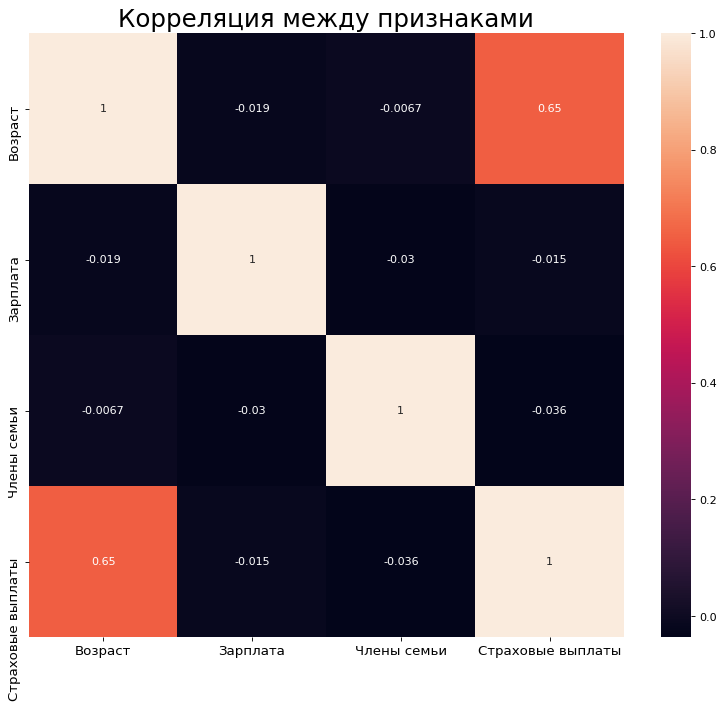

In [40]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df[df.columns[1:]].corr(), annot=True)
plt.title('Корреляция между признаками', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Таблица корреляции и тепловая карта явно показывают, что в большинстве случаев корреляция между признаками отсутствует. Наблюдается средний уровень корреляции 0.65 между возрастом и наличием страховых выплат.

Визуальный анализ распределения данных в датасете.

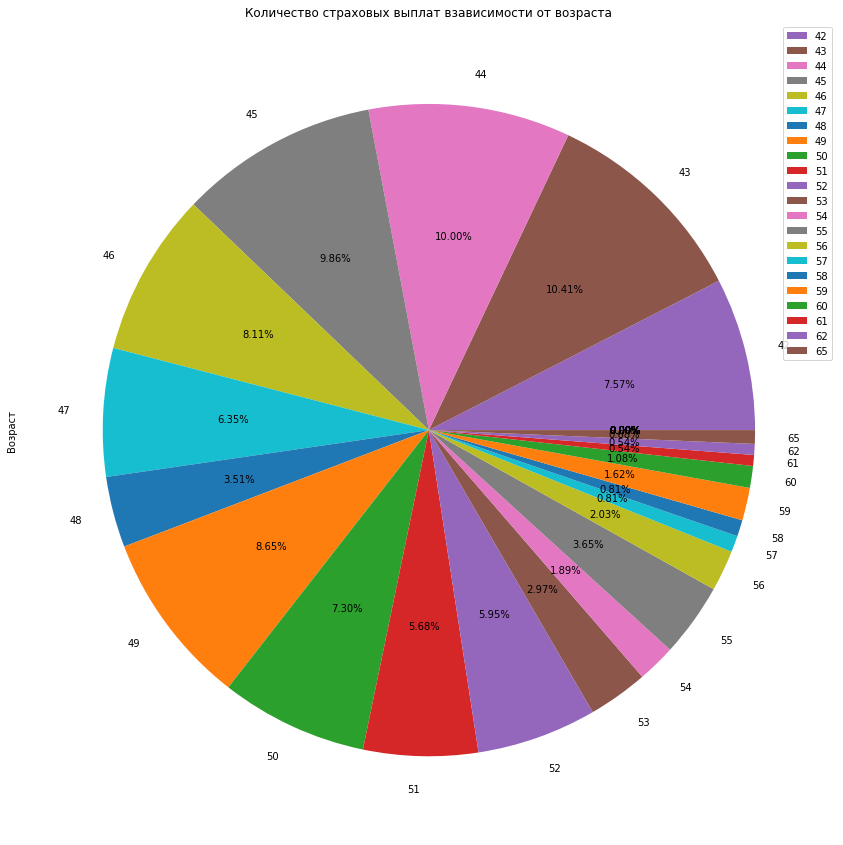

In [41]:
df_age = df.groupby(['Возраст']).sum()
df_age.plot(kind='pie', y='Страховые выплаты', subplots=True, autopct='%1.2f%%', figsize=(15, 15))
plt.title('Количество страховых выплат взависимости от возраста')
plt.ylabel('Возраст')
plt.show()

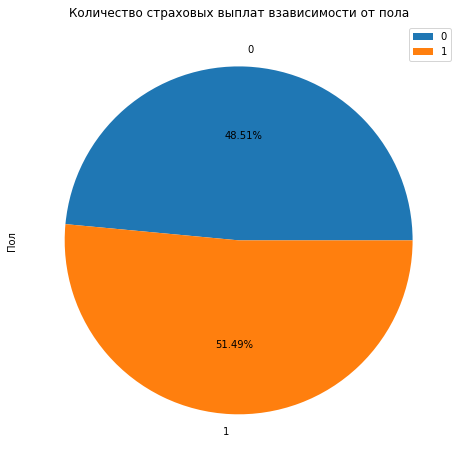

In [42]:
df_gender = df.groupby(['Пол']).sum()
df_gender.plot(kind='pie', y ='Страховые выплаты', subplots=True, autopct='%1.2f%%', figsize=(8, 8))
plt.title('Количество страховых выплат взависимости от пола')
plt.ylabel('Пол')
plt.show()

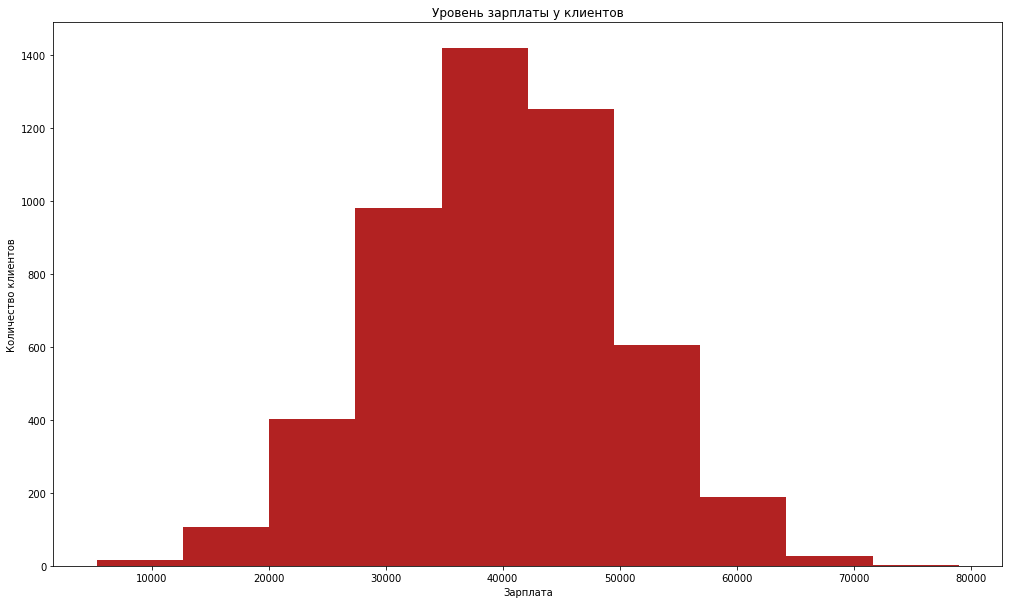

In [43]:
df['Зарплата'].plot(kind='hist', subplots=True, color='firebrick', linewidth=20, figsize=(17, 10))
plt.title('Уровень зарплаты у клиентов')
plt.xlabel('Зарплата')
plt.ylabel('Количество клиентов')
plt.show()

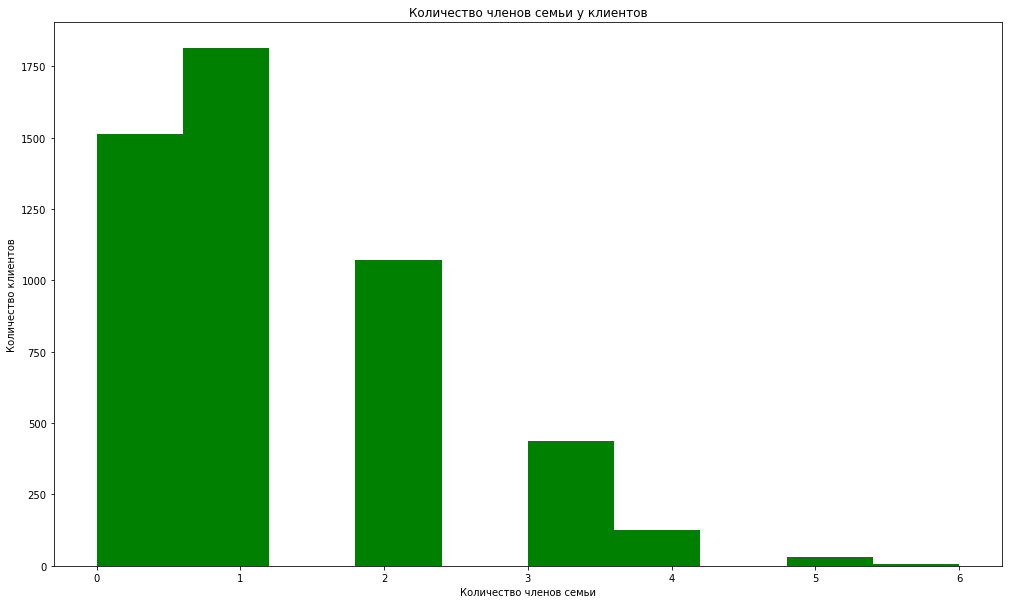

In [44]:
df['Члены семьи'].plot(kind='hist', subplots=True, color='green', linewidth=30, figsize=(17, 10))
plt.title('Количество членов семьи у клиентов')
plt.xlabel('Количество членов семьи')
plt.ylabel('Количество клиентов')
plt.show()

Анализ распределения значений признаков показал, что значения распределены равномерно. Количество выплат взависимости от возвраста равномерны, явных лидеров не наблюдается. Основной интервал страховых выплат по возрасту находится в границе от 42 до 52 лет. 
    Зависимость от пола не выявлена, так как показатели распределены в равном соотношении: 51.49% : 48.51%.
    Уровень зарплаты в большинстве случаев находится от 30 000 до 50 000 рублей.
    Количество членов семьи от 0 до 2 в большинстве случае. Наличие членов семей от 3 и более имеет низкий показатель.

Вывод.
    Общий анализ данных показал, что информация датасета подходит для дальнейшего анализа и проверки данных. 
    Тип данных по всем столбцах скорректирован на цельночисловой.
    Пропущенных значений нет, явные дубликаты имеются в незначительном количестве. Аномалий в данных не выявлено. Данные распределены равномерно.
    

## Умножение матриц

 Проверка предположения: изменится ли качество линейной регрессии, если признаки умножают на обратимую матрицу?
a. Изменится. Приведите примеры матриц.
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
N = XP
$$

$$
a^N = Nw
$$

$$
w^N = (N^T N)^{-1} N^T y
$$

$$
w^N = ((XP)^TXP))^{-1}(XP)^T y
$$
$$
w^N = ((XP)^TXP)^{-1}(XP)^T y
$$
$$
w^N = (P^T(X^TX)P)^{-1})(XP)^Ty
$$

$$
(P^T)^{-1}P^T= E
$$

$$
w^N = P^{-1}(X^TX)^{-1}EX^T y
$$

$$
w^N = P^{-1}(X^TX)^{-1}X^T y
$$


По формуле обучения:
$$
w = (X^T X)^{-1} X^T y
$$
Получаем формулу:

$$
a^N = NP^{-1}w
$$
$$
a^N = XPP^{-1}w
$$
$$
PP^{-1} = E - единичная матрица
$$
$$
a^N = Xw
$$

$$
a^N = Xw
$$
$$
a^N = a
$$

Вывод.
В результате расчета формулы предсказания с новой матрицей доказано, что  качество линейной регрессии не изменится. 
$$
a^N = a
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$

## Алгоритм преобразования

 **Обоснование**
Для преобразования данных сначала выделим признаки и целевой признак датасета.

In [45]:

features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

In [46]:
matrix_rand = np.random.rand(4, 4)

In [47]:
matrix_inv = np.linalg.inv(matrix_rand)

При создании обратной матрицы ошибок нет, поэтому это говорит о том, что обратная матрица имеется.

Данные формулы используем для подсчета результатов модели обучения и предсказания
$$
a = Xw
$$
$$
w = (X^T X)^{-1} X^T y
$$

In [48]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
a = features @ w

In [49]:
features_new = features @ matrix_rand

In [50]:
w_new = np.linalg.inv(features_new.T.dot(features_new)).dot(features_new.T).dot(target)
a_new = features_new @ w_new

In [51]:
contrast = a_new - a 
print(contrast.sum())

-1.2392218199487517e-05


Качество линейной регрессии не изменилось после преобразования данных обратимой матрицей. Разница в уровне значений менее нуля. Что доказывает, что применение обратимой матрицы не влияет на уровень успешности линейной регресии.

## Проверка алгоритма

In [52]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550308169177


In [53]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_new, target)
predictions = model.predict(features_new)

print(r2_score(target, predictions))

0.42494550308165524


Показатель R2 у исходных данных и новых данных, изменных с использованием обратной матрицы имеет разницу менее 0.00. Что доказывает, что изменение данных не влияет на качество обучения линейной регрессии.

Вывод.
    Алгоритм был запрограммирован на обучение линейной регрессии с применениме матричных операций.
    Показатели R2 имеют небольшую разницу, что доказывает, что использование обратимой матрицы с новыми данными слабо влияет на уровень обучения линейной регресии.

Общий вывод.
    Была проведена исследовательская работа по анализу и проверки предположений о влиянии скорректированных данных признаков датасета на успешность обучения линейной регрессии с применением матричных операций.
    Данные датасета имеют числовые значения. Нет пропущенных значений, явные дубликаты есть, их незначительное количество от общего числа, что не повлияет на дальнейшую работу. Все данные были приведены к цельночисловому типу данных, что облегчает работу с ними.
    При анализе данных аномально высоких показателей найдено не было. Признаки распределены равномерно, корреляции между признаками нет, кроме связи наличия страховых выплат и возраста клиентов, средний уровень 0.65. Большинство клиентов, которые получили выплаты это люди от 42 до 52 лет. Наличие членов семьи у клиентов, в основном от 0 до 3 человек.
    Анализ данных показал, что они подходят для дальнейшего исследования и корректировки не требуют.
    Расчет по формуле обучения новой матрицы, полученной путем умножения признаков на обратимую матрицу доказал, что это не влияет на качество обучения линейной регресии.
    Алгоритм преобразования данных для решения задачи с использованием формулы обучения и предсказания доказал, что качество линейной регрессии не изменяется. Разница менее 0.
    При использовании матричных операций для обучения линейной регрессии уровень успешности обучения практически не изменился, что показал уровень параметра R2.
    Таким образом, можно сделать вывод, что изменение исходных данных напрямую не влияет на повышение качества модели обучения линейной регресии.